In [15]:
# Clustering
# Importing the libraries
import numpy as np
import pandas as pd
import os.path
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"c2k_data_comma.csv")
df.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,?,?,?,?,?,?,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,?,?,?,?,?,?,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,?,?,?,?,?,?,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,?,?,?,?,?,?,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,?,?,?,?,?,?,4140.0,4797.0,2.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 98 columns):
nr                3942 non-null float64
i1_legid          3942 non-null float64
i1_rcs_p          3942 non-null float64
i1_rcs_e          3942 non-null float64
i1_dep_1_p        3942 non-null float64
i1_dep_1_e        3942 non-null float64
i1_dep_1_place    3942 non-null float64
i1_rcf_1_p        3942 non-null float64
i1_rcf_1_e        3942 non-null float64
i1_rcf_1_place    3942 non-null float64
i1_dep_2_p        3942 non-null object
i1_dep_2_e        3942 non-null object
i1_dep_2_place    3942 non-null object
i1_rcf_2_p        3942 non-null object
i1_rcf_2_e        3942 non-null object
i1_rcf_2_place    3942 non-null object
i1_dep_3_p        3942 non-null object
i1_dep_3_e        3942 non-null object
i1_dep_3_place    3942 non-null object
i1_rcf_3_p        3942 non-null object
i1_rcf_3_e        3942 non-null object
i1_rcf_3_place    3942 non-null object
i1_dlv_p          3942 no

In [9]:
df.isnull().sum()

nr                1
i1_legid          1
i1_rcs_p          1
i1_rcs_e          1
i1_dep_1_p        1
i1_dep_1_e        1
i1_dep_1_place    1
i1_rcf_1_p        1
i1_rcf_1_e        1
i1_rcf_1_place    1
i1_dep_2_p        1
i1_dep_2_e        1
i1_dep_2_place    1
i1_rcf_2_p        1
i1_rcf_2_e        1
i1_rcf_2_place    1
i1_dep_3_p        1
i1_dep_3_e        1
i1_dep_3_place    1
i1_rcf_3_p        1
i1_rcf_3_e        1
i1_rcf_3_place    1
i1_dlv_p          1
i1_dlv_e          1
i1_hops           1
i2_legid          1
i2_rcs_p          1
i2_rcs_e          1
i2_dep_1_p        1
i2_dep_1_e        1
                 ..
i3_rcf_3_e        1
i3_rcf_3_place    1
i3_dlv_p          1
i3_dlv_e          1
i3_hops           1
o_legid           1
o_rcs_p           1
o_rcs_e           1
o_dep_1_p         1
o_dep_1_e         1
o_dep_1_place     1
o_rcf_1_p         1
o_rcf_1_e         1
o_rcf_1_place     1
o_dep_2_p         1
o_dep_2_e         1
o_dep_2_place     1
o_rcf_2_p         1
o_rcf_2_e         1


In [11]:
df.describe()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,...,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,1971.342973,7304.492136,2203.533486,1653.323440,205.891933,711.408929,503.703957,796.002790,666.358447,466.677829,...,207.128869,803.902588,479.703957,855.679097,690.343734,461.304414,3573.239726,3698.563673,1.474632,2.012177
std,1138.331044,4246.072270,4683.333105,4553.855588,140.283173,684.789184,232.776578,439.991579,764.145906,237.373952,...,157.631760,817.572534,208.574548,441.088279,446.911715,240.296704,1734.596116,14422.433250,0.512459,0.825165
min,0.000000,1.000000,5.000000,1.000000,75.000000,4.000000,101.000000,50.000000,13.000000,101.000000,...,90.000000,18.000000,101.000000,45.000000,1.000000,100.000000,240.000000,1.000000,1.000000,1.000000
25%,986.250000,3591.250000,377.750000,113.000000,120.000000,263.000000,308.000000,455.000000,274.000000,281.000000,...,90.000000,303.000000,341.000000,630.000000,385.000000,206.000000,2880.000000,400.000000,1.000000,1.000000
50%,1971.500000,7429.500000,1085.000000,340.000000,180.000000,516.000000,485.000000,820.000000,657.500000,485.000000,...,180.000000,600.000000,485.000000,840.000000,658.500000,476.000000,3780.000000,1201.500000,1.000000,2.000000
75%,2956.750000,10922.250000,1946.500000,1375.000000,240.000000,949.750000,700.000000,1020.000000,883.000000,700.000000,...,240.000000,1029.500000,671.000000,1050.000000,920.000000,700.000000,4080.000000,3174.250000,2.000000,3.000000
max,3942.000000,14661.000000,47190.000000,46357.000000,2876.000000,9513.000000,815.000000,5001.000000,38116.000000,815.000000,...,1620.000000,12256.000000,815.000000,4986.000000,5520.000000,815.000000,11520.000000,560130.000000,3.000000,3.000000


In [13]:
# Display all numeric (float and int) variables from the dataset.
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head(10)

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,240.0,2865.0,256.0,1330.0,1265.0,411.0,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,300.0,286.0,431.0,835.0,526.0,256.0,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,240.0,969.0,700.0,1200.0,1280.0,349.0,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,90.0,883.0,671.0,815.0,956.0,700.0,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,180.0,131.0,166.0,230.0,167.0,128.0,4140.0,4797.0,2.0,1.0
5,5.0,9889.0,181.0,98.0,240.0,259.0,815.0,215.0,223.0,128.0,...,240.0,308.0,128.0,960.0,682.0,597.0,3960.0,467.0,1.0,2.0
6,6.0,3997.0,1300.0,212.0,240.0,1267.0,815.0,270.0,135.0,391.0,...,570.0,763.0,391.0,80.0,79.0,281.0,2880.0,151.0,1.0,3.0
7,7.0,7125.0,139.0,87.0,240.0,232.0,783.0,255.0,154.0,815.0,...,240.0,298.0,128.0,960.0,678.0,597.0,3960.0,161.0,1.0,2.0
8,8.0,10481.0,387.0,68.0,240.0,514.0,815.0,285.0,219.0,485.0,...,180.0,677.0,485.0,885.0,695.0,149.0,6680.0,2830.0,1.0,1.0
9,9.0,3212.0,6145.0,6013.0,300.0,385.0,690.0,810.0,635.0,555.0,...,300.0,481.0,555.0,820.0,625.0,356.0,3960.0,218.0,1.0,1.0


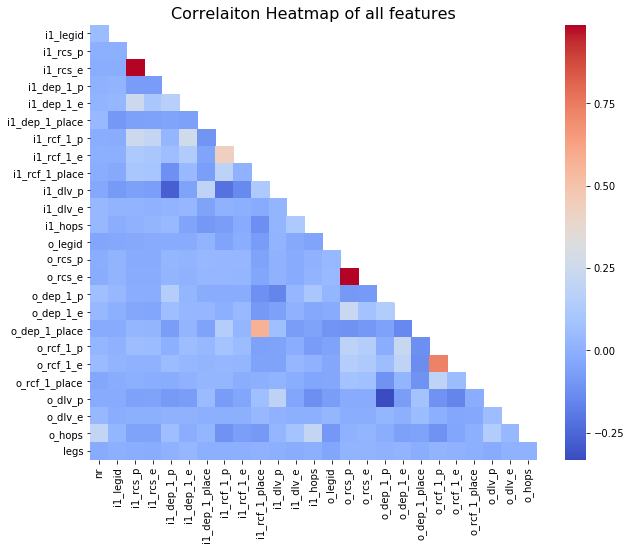

In [17]:
# Review if any potential correlations between attributes
corr_mat = df.corr()
mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')
plt.title('Correlaiton Heatmap of all features', fontsize=16)
plt.show()

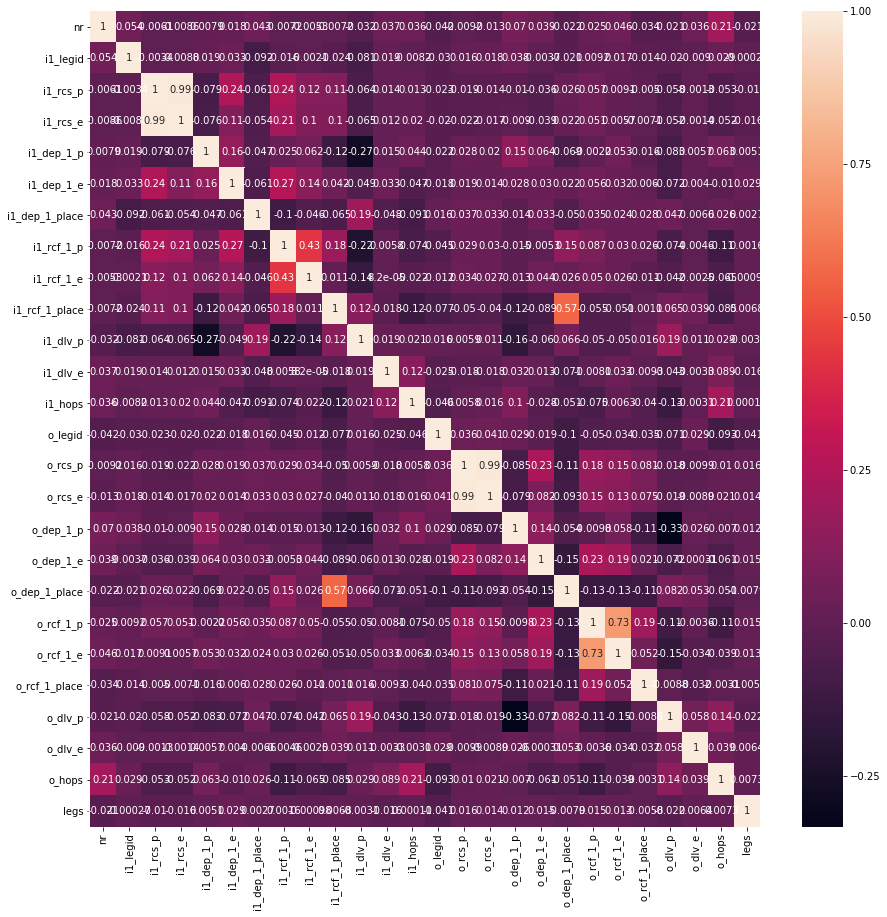

In [19]:
# Plot correlations on a heatmap
plt.figure(figsize=[15, 15])
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

KeyError: 1